# Wine classier - Red Wine, white Wine

In [1]:
# We get required libraries 
import pandas as pd
import numpy as np
import sklearn
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import operator
import matplotlib.pyplot as plt
import time

In [2]:
red = pd.read_csv('C:\\Users\manoj\OneDrive\Desktop\P_kit\Project_1\Wine_quality\.spyproject\winequality-red.csv', header=0, low_memory=False, sep = ';')
white = pd.read_csv("C:\\Users\manoj\OneDrive\Desktop\P_kit\Project_1\Wine_quality\.spyproject\winequality-white.csv",header=0, low_memory=False, sep = ';')

In [4]:
def call(functionToCall):
    #print('Red')
    functionToCall(red)
    
    print('\n')
    
    #print('white')
    functionToCall(white)
    print('\n')

In [5]:
def remove_col_spaces(wine_set):
    wine_set.columns = [x.strip().replace(' ', '_') for x in wine_set.columns]
    return wine_set
call(remove_col_spaces)

## We get more detailing about Red wine

In [7]:
# We create an addition column quality and cotegorise by quality below 5 is 0, above 5 is 1 
# Recode quality
recode = {3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1}
red['quality_c'] = red['quality'].map(recode)

In [9]:
# split the data and get the predictors and targets 
predictors = red[["density", 'alcohol', 'sulphates', 'pH', 'volatile_acidity', 'chlorides', 'fixed_acidity',
                           'citric_acid', 'residual_sugar', 'free_sulfur_dioxide', 'total_sulfur_dioxide']]
targets = red.quality_c

pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.4)

In [11]:
# build model on training data
classifier = RandomForestClassifier(n_estimators=25)
classifier = classifier.fit(pred_train, tar_train)

In [12]:
# predicitons on testing data
predictions = classifier.predict(pred_test)

# print the confusion matrix and accuracy of the model
print('confusion matrix:\n', sklearn.metrics.confusion_matrix(tar_test, predictions))
print('\naccuracy:', sklearn.metrics.accuracy_score(tar_test, predictions))

confusion matrix:
 [[235  65]
 [ 68 272]]

accuracy: 0.7921875


In [13]:
# to display the relative importance of each predictive variable
model = ExtraTreesClassifier()
model.fit(pred_train, tar_train)

ExtraTreesClassifier()

In [14]:
# Feature Importance refers to techniques that calculate a score for all the input features for a given model 
# -->the scores simply represent the “importance” of each feature
# A higher score means that the specific feature will have a larger effect on the model that, is being used to predict
# a certain variable. 
dct = dict()
for c in range(len(predictors.columns)):
    dct[predictors.columns[c]] = model.feature_importances_[c]
print(sorted(dct.items(), key=operator.itemgetter(1), reverse=True))

importance of predictors:
[('alcohol', 0.18280086500788373), ('volatile_acidity', 0.10784489230610765), ('total_sulfur_dioxide', 0.1077672253311617), ('sulphates', 0.10656858184196602), ('density', 0.08142107474344723), ('citric_acid', 0.0764874843311953), ('chlorides', 0.07144049249137578), ('fixed_acidity', 0.07131599100201819), ('free_sulfur_dioxide', 0.06689476850765838), ('residual_sugar', 0.06424159465182327), ('pH', 0.06321702978536264)]


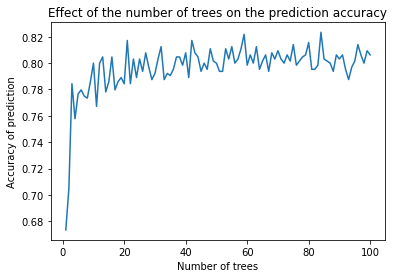

In [15]:
# run different numbers of trees to see the effect of the number on the accuracy of the prediction
n = 100
accuracy = [0]*n

for i in range(n):
    classifier = RandomForestClassifier(n_estimators=i+1)
    classifier = classifier.fit(pred_train, tar_train)
    predictions = classifier.predict(pred_test)
    accuracy[i] = sklearn.metrics.accuracy_score(tar_test, predictions)

plt.plot(range(1, n+1), accuracy)
plt.xlabel("Number of trees")
plt.ylabel("Accuracy of prediction")
plt.title("Effect of the number of trees on the prediction accuracy")
plt.show()


### We write a function for both wine datasets

----------------Random Forests------------------------
confusion matrix:
 [[259  62]
 [ 48 271]]

accuracy: 0.828125
importance of predictors:
[('alcohol', 0.17709719722387124), ('sulphates', 0.11539845403087375), ('volatile_acidity', 0.098270237696397), ('total_sulfur_dioxide', 0.09447474525065866), ('density', 0.08209663815463066), ('chlorides', 0.07664404129082403), ('residual_sugar', 0.07464680172357893), ('fixed_acidity', 0.07234512107724016), ('citric_acid', 0.07208724216694433), ('free_sulfur_dioxide', 0.06908920435582179), ('pH', 0.06785031702915953)]


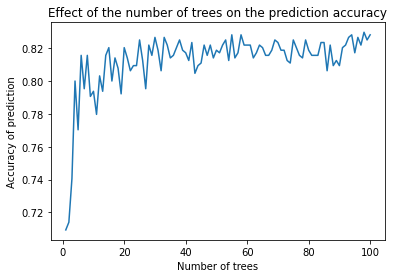

[0.709375, 0.7140625, 0.740625, 0.8, 0.7703125, 0.815625, 0.7953125, 0.815625, 0.790625, 0.79375, 0.7796875, 0.803125, 0.79375, 0.815625, 0.8203125, 0.8, 0.8140625, 0.8078125, 0.7921875, 0.8203125, 0.8140625, 0.80625, 0.809375, 0.809375, 0.825, 0.8125, 0.7953125, 0.821875, 0.815625, 0.8265625, 0.81875, 0.80625, 0.8265625, 0.821875, 0.8140625, 0.815625, 0.8203125, 0.825, 0.81875, 0.8171875, 0.8125, 0.8234375, 0.8046875, 0.809375, 0.8109375, 0.821875, 0.815625, 0.821875, 0.8140625, 0.81875, 0.8171875, 0.821875, 0.825, 0.8125, 0.828125, 0.8140625, 0.8171875, 0.828125, 0.821875, 0.821875, 0.821875, 0.8140625, 0.8171875, 0.821875, 0.8203125, 0.815625, 0.815625, 0.81875, 0.825, 0.8234375, 0.81875, 0.81875, 0.8125, 0.8109375, 0.825, 0.8203125, 0.815625, 0.8140625, 0.825, 0.81875, 0.815625, 0.815625, 0.815625, 0.8234375, 0.8234375, 0.80625, 0.821875, 0.809375, 0.8125, 0.809375, 0.8203125, 0.821875, 0.8265625, 0.828125, 0.8171875, 0.8265625, 0.821875, 0.8296875, 0.825, 0.828125]


confusion mat

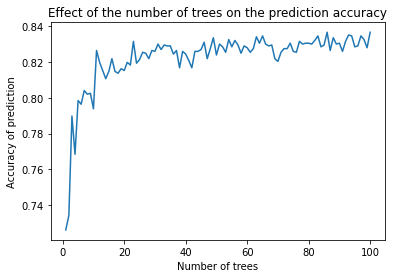

[0.7260204081632653, 0.7341836734693877, 0.789795918367347, 0.7683673469387755, 0.798469387755102, 0.7964285714285714, 0.8040816326530612, 0.8020408163265306, 0.8025510204081633, 0.7938775510204081, 0.826530612244898, 0.8198979591836735, 0.8153061224489796, 0.8107142857142857, 0.814795918367347, 0.8219387755102041, 0.814795918367347, 0.8137755102040817, 0.8163265306122449, 0.8153061224489796, 0.8198979591836735, 0.8183673469387756, 0.8316326530612245, 0.8193877551020409, 0.8214285714285714, 0.8255102040816327, 0.825, 0.8219387755102041, 0.826530612244898, 0.8260204081632653, 0.8301020408163265, 0.8270408163265306, 0.8295918367346938, 0.8290816326530612, 0.8290816326530612, 0.8244897959183674, 0.826530612244898, 0.8168367346938775, 0.8260204081632653, 0.8244897959183674, 0.8209183673469388, 0.8168367346938775, 0.8260204081632653, 0.8260204081632653, 0.8270408163265306, 0.8311224489795919, 0.8219387755102041, 0.8275510204081633, 0.8336734693877551, 0.8239795918367347, 0.8301020408163265,

In [6]:
tic = time.process_time()
def random_forests(wine_set):
    # recode quality (response variable) into 2 groups: 0:{3,4,5}, 1:{6,7,8,9}
    recode = {3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1}
    wine_set['quality_c'] = wine_set['quality'].map(recode)

    # split into training and testing sets
    predictors = wine_set[["density", 'alcohol', 'sulphates', 'pH', 'volatile_acidity', 'chlorides', 'fixed_acidity',
                           'citric_acid', 'residual_sugar', 'free_sulfur_dioxide', 'total_sulfur_dioxide']]

    targets = wine_set.quality_c

    pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.4)

    # build model on training data#
    classifier = RandomForestClassifier(n_estimators=25)
    classifier = classifier.fit(pred_train, tar_train)

    predictions = classifier.predict(pred_test)
    # print the confusion matrix and accuracy of the model
    print('confusion matrix:\n', sklearn.metrics.confusion_matrix(tar_test, predictions))
    print('\naccuracy:', sklearn.metrics.accuracy_score(tar_test, predictions))

    # to display the relative importance of each predictive variable
    model = ExtraTreesClassifier()
    model.fit(pred_train, tar_train)

    print('importance of predictors:')
    dct = dict()
    for c in range(len(predictors.columns)):
        dct[predictors.columns[c]] = model.feature_importances_[c]
    print(sorted(dct.items(), key=operator.itemgetter(1), reverse=True))

    # run different numbers of trees to see the effect of the number on the accuracy of the prediction
    n = 100
    accuracy = [0]*n

    for i in range(n):
        classifier = RandomForestClassifier(n_estimators=i+1)
        classifier = classifier.fit(pred_train, tar_train)
        predictions = classifier.predict(pred_test)
        accuracy[i] = sklearn.metrics.accuracy_score(tar_test, predictions)

    plt.plot(range(1, n+1), accuracy)
    plt.xlabel("Number of trees")
    plt.ylabel("Accuracy of prediction")
    plt.title("Effect of the number of trees on the prediction accuracy")
    plt.show()

    print(accuracy)

print('----------------Random Forests------------------------')
call(random_forests)